# 브런치 데이터셋 프로젝트

수집한 데이터셋을 배포할 수 있도록 처리

## raw_dataset에 있는 파일 불러오기

In [1]:
import os

data_path ="./raw_dataset"
file_list = os.listdir(data_path)

file_path_list = []
for file in file_list:
    file_path_list.append(data_path + '/' + file)

In [2]:
import pandas as pd
import re

df_dict = {}
for file in file_path_list:
    df = pd.read_csv(file)
    keyword = re.search('./raw_dataset/(.+?)_dataset', file)
    df_dict[keyword.group(1)] = df

## 데이터 확인

### 수집에 사용한 키워드 확인

In [8]:
keywords = df_dict.keys()
keywords = list(keywords)
#keywords

In [9]:
len(keywords)

118

In [10]:
df_dict['건강'].loc[range(10), ['title','sub_title', 'body_text', 'keyword']]

,title,sub_title,body_text,keyword
0,내 몸이 나에게 말을 걸다.,<중년의 진로수업>,\n요즘은 모든 것이 스마트. 아침에 눈을 떠서 핸드폰을 열면 어플이 정확한 수면시...,"['중년', '건강', '일상']"
1,하체에서 전달되는 원인모를 통증 '좌골신경통'에 대해서,소리없이 찾아오는 불편한 소식 좌골신경통,\n 어느 날 갑자기 관절주변에서 통증이 발생된다면 운동부족과 더불어 오랜시간 잘못...,"['건강', '노인', '운동']"
2,아찔한 순간,구급차를 또 타게 되다니,\n명절 연휴가 끝나고 일상으로 돌아가는 첫날인 오늘\n나는 하루의 휴가가 더 있어...,"['구급차', '건강', '반성']"
3,하루 한 권 독서,[당신은 뇌를 고칠 수 있다]-톰 브라이언,\n지금 건강한 내가 5년 뒤에도 건강할 거라는 보장을 할 수 있을까? 건강에 대한...,"['저자', '건강']"
4,정신병동에서 일하는 심리학자,심리선생님 만나는 날!,\n글 내용에 포함되는 모든 사례는 새롭게 구성하고 재가공된 사례입니다. 상담자는 ...,"['심리학', '건강', '감성에세이']"
5,폭식증! 이렇게 극복하세요,"식이장애, 폭식습관 극복 할 수 있는 완벽한 방법","\n폭식을 하면서 확실하게 느낀 게 있다. 허함을 채우려는 욕구, 먹으면 안 된다는...","['건강', '심리', '멘탈']"
6,도수치료 10회권을 끊었다,바른 자세의 중요성,\n\n처음에는 '잠을 이상하게 자서 그런가'라고 가벼이 생각했다. 그런데 시간이 ...,"['건강', '건강관리', '생활건강']"
7,덤으로 주어진 하루,매너리즘의 극복,\n“여전히 다른 사람들과 교류하는 건 힘드신가요?”\n\n“남들과 별로 이야기하고...,"['에세이', '건강', '가족']"
8,지금 떠나도 나쁘지 않을 것 같아,방향 전환,\n“나 지금 정말 맨 정신이야. 정말 진지하게 생각해 봤는데 지금까지 내가 살아온...,"['에세이', '건강', '가족']"
9,담당선생님을 바꾸겠습니다,귀 기울여야 할 대상,\n다시 만난 담당의는 남편에게 다시 걷지 못할 것이라 말했던 사실조차 기억하지 못...,"['에세이', '건강', '가족']"


### 전체 에세이 수 확인

In [11]:
num_essay = 0
num_essay_tup = []
for keyword in keywords:
    #print(f"{keyword}:{len(df_dict[keyword])}")
    num_essay_tup.append((keyword,len(df_dict[keyword])))
    num_essay += len(df_dict[keyword])
print(f"전체 에세이 수: {num_essay}")

전체 에세이 수: 1108528


### 키워드별 에세이 수 시각화

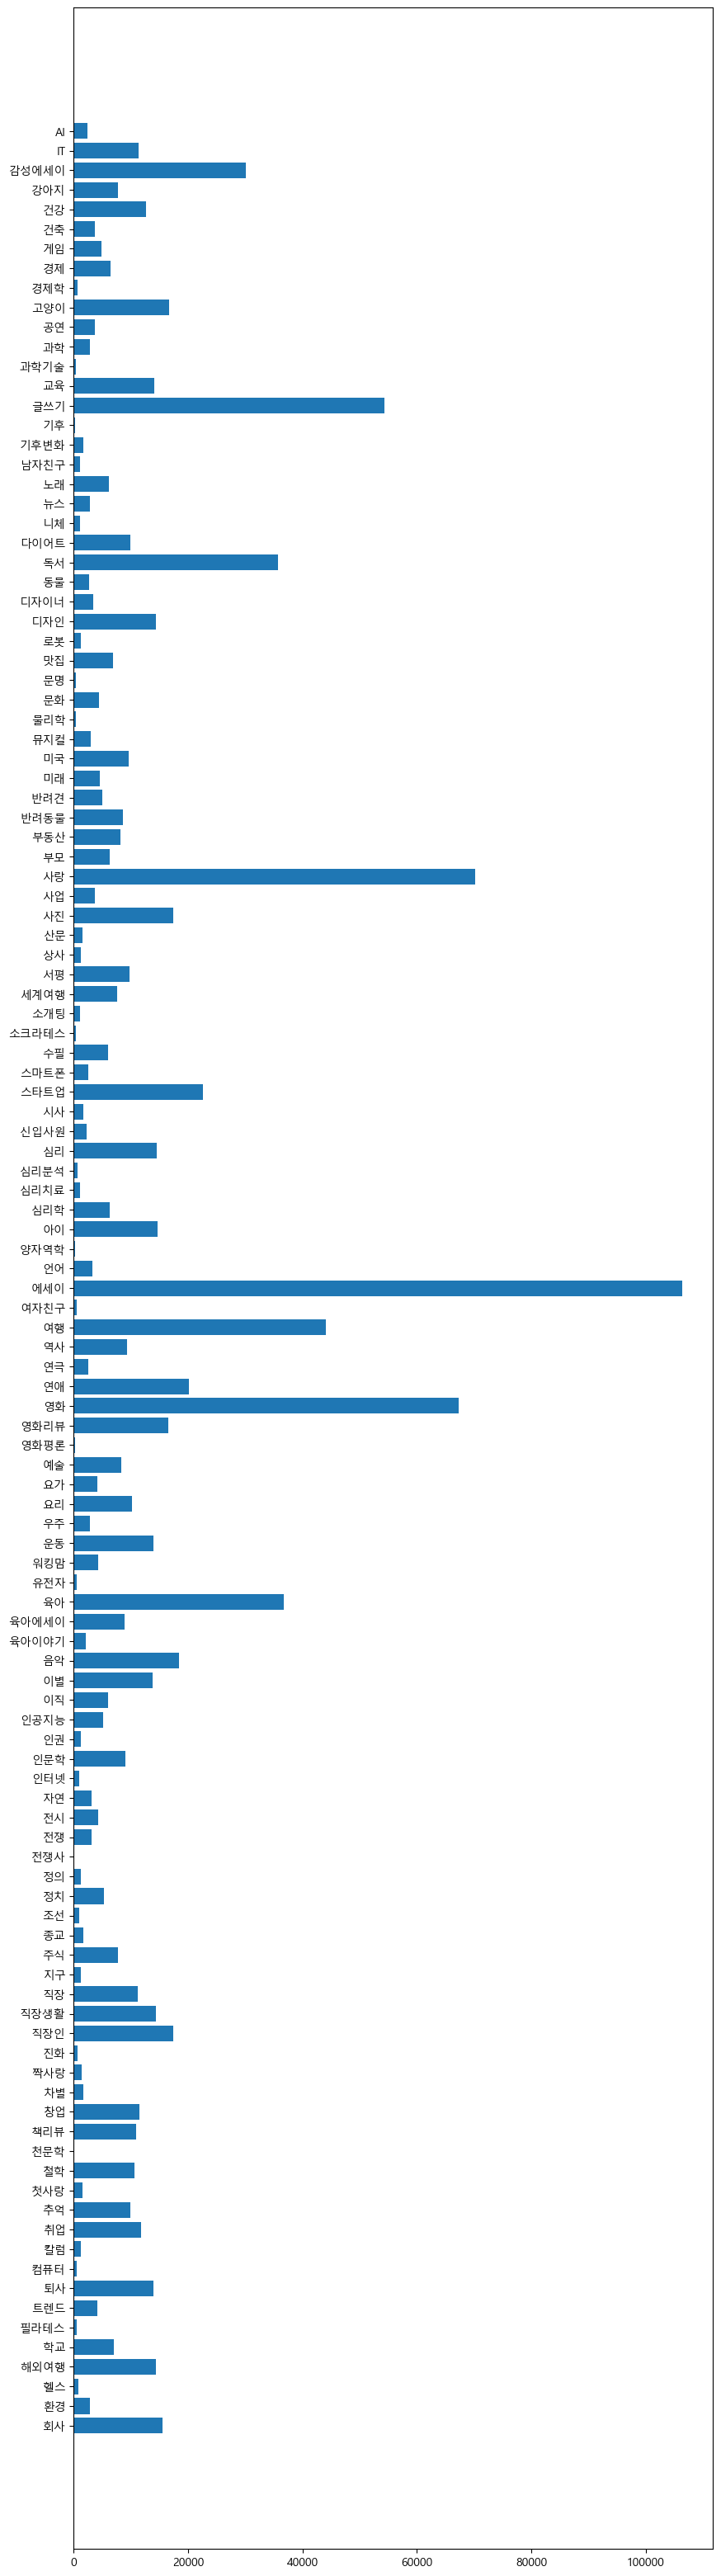

In [12]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:\Windows\Fonts\malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

x = [tup[0] for tup in num_essay_tup]
y = [tup[1] for tup in num_essay_tup]

plt.figure(figsize=(10, 40))
plt.barh(x[::-1],y[::-1])
plt.savefig('keyword_num_essay.png', dpi=300)
plt.show()


### 하나의 데이터프레임으로 합치기

In [13]:
df_list = df_dict.values()
total_df = pd.concat(df_list, ignore_index=True)

In [14]:
total_df

,title,sub_title,body_text,keyword,likes,num_comments,post_date,post_url,author,author_id,author_belong,author_desc,num_subscription
0,컴퓨터 비전 기술 활용 AI개발 사례,스노우같은 셀카앱을 만들고 싶다면,\n\n\n오늘 다뤄볼 주제는 컴퓨터 비전이라는 기술입니다.\n\n우리가 흔히 알고...,"['컴퓨터비전', '비전', 'AI']",4,0,2023-01-25,https://brunch.co.kr/@brunchk1wj/57,김성장,@brunchk1wj,CEO,"AI 솔루션 스타트업, 디피니트 대표 김도환입니다.",38
1,AI 어시스턴트의 보이스를 통한 이모티콘 활용 방법,Part 2. 탐구생활 #2,\n현대 사회의 커뮤니케이션\n\n현대 사회는 스마트폰을 통해서 시공간적 제약의 한...,"['이모티콘', 'AI', 'UX디자인']",8,0,2023-01-25,https://brunch.co.kr/@soonkyujang/119,Qsigner,@soonkyujang,디자이너,"일상의 소소한 소재를 탐구하고, 호기심을 상식으로 써내려가는 잡지식의 UX 디자이너.",2329
2,AI기반 프레젠테이션 자동생성 솔루션 tome 소개,NaN,\n아래 글은 Generative Tech 스터디 1기에서 작성한 글입니다. Gen...,"['프레젠테이션', '생산성', 'AI']",7,0,2023-01-25,https://brunch.co.kr/@taewookim/75,TaeWoo Kim,@taewookim,CEO,내 지식과 경험을 수익으로 만드는 가장 쉬운 방법 에브리크리 (링크트리+ 내상품판매...,1384
3,계산기같은 ChatGPT,검색을 넘어서는 원샷원킬일까?,\n구글마저 긴장케할 정도로 파죽지세로 뜨거운 감자가 되고 있는 OpenAI의 대화...,"['검색', 'AI', '계산기']",10,0,2023-01-25,https://brunch.co.kr/@ioojoo/236,OOJOO,@ioojoo,출간작가,디지털 기술이 사회와 산업 그리고 기업과 개인에 가져다 주는 변화와 이에 대한 대응...,2248
4,AI로 이미지 만들기 (매우 쉬움),Midjourney 사용 후기,\n요즘 AI로 인터넷이 난리도 아니다. 특히 챗GPT. OpenAI사에서 신규로 ...,"['AI', '인공지능', '챗봇']",15,1,2023-01-25,https://brunch.co.kr/@khakiparka/32,카키파카,@khakiparka,에세이스트,Put on a parka and walk.,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108523,박지연,마녀를 만난 사회초년생,\n지연은 운이 좋게도 졸업 직전에 취업에 성공했다. 대기업 계열사인 모 광고회사의...,"['마녀', '사회생활', '회사']",1,19,2015-07-21,https://brunch.co.kr/@daljasee/20,고수리,@daljasee,에세이스트,책과 펜과 밤과 마음을 쓰는 에세이스트,19000
1108524,나의 이직 경험기.,긴 글을 쓰는 건 어려운 일이네요.,"\n나는 세 곳의 직장에서 일을 했고, 네 번째 직장에서 일하고 있어요.\n\n나는...","['이직', '직장', '회사']",1,12,2015-07-04,https://brunch.co.kr/@daeheejang/6,장대희,@daeheejang,개발자,개발자,196
1108525,"아빠, 아버지.",NaN,"\n내가 어릴적엔 아버지는 \n힘세고, 무섭고, 과묵하고... \n매일같이 일만하는...","['주말', '여행', '회사']",0,11,2015-07-01,https://brunch.co.kr/@legoilgi/4,레고일기 Legoilgi,@legoilgi,디자이너,레고로 일상을 기록하다.,45
1108526,창작자는 꼭 혼자여야 할까?,We-freekey와 Freekey.co 에 대한 블라블라,"\n스토리 제목은 ""팝아티스트의 회사 만들기(이전 제목)""인데 실제 회사 만들기는 ...","['혼자여야', '회사', '창작자']",1,2,2015-07-01,https://brunch.co.kr/@reeccu/3,릭킴 Rickkim,@reeccu,아티스트,내 안에 있는 무언가를 현실로 가져오고 싶어 발버둥치는 사람입니다. 이야기를 하고 ...,1101


### 데이터 프레임 속성 확인

In [17]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108528 entries, 0 to 1108527
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   title             1108488 non-null  object
 1   sub_title         815452 non-null   object
 2   body_text         1102783 non-null  object
 3   keyword           1108528 non-null  object
 4   likes             1108528 non-null  int64 
 5   num_comments      1108528 non-null  int64 
 6   post_date         1108528 non-null  object
 7   post_url          1108528 non-null  object
 8   author            1108408 non-null  object
 9   author_id         1108528 non-null  object
 10  author_belong     845850 non-null   object
 11  author_desc       1107648 non-null  object
 12  num_subscription  1108528 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 109.9+ MB


### 결측치 확인

각 column의 결측치 확인

In [18]:
total_df.isnull().sum()

title                   40
sub_title           293076
body_text             5745
keyword                  0
likes                    0
num_comments             0
post_date                0
post_url                 0
author                 120
author_id                0
author_belong       262678
author_desc            880
num_subscription         0
dtype: int64

#### 결측치 제거하기
* body_text가 null인 행
* title이 null인 행

In [19]:
total_df = total_df.dropna(subset=['body_text'])
total_df = total_df.dropna(subset=['title'])
total_df.reset_index(inplace=True, drop=True) # 인덱스 초기화
total_df.isnull().sum()

title                    0
sub_title           290979
body_text                0
keyword                  0
likes                    0
num_comments             0
post_date                0
post_url                 0
author                 120
author_id                0
author_belong       261613
author_desc            879
num_subscription         0
dtype: int64

### url 기준 중복 제거 

In [20]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102743 entries, 0 to 1102742
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   title             1102743 non-null  object
 1   sub_title         811764 non-null   object
 2   body_text         1102743 non-null  object
 3   keyword           1102743 non-null  object
 4   likes             1102743 non-null  int64 
 5   num_comments      1102743 non-null  int64 
 6   post_date         1102743 non-null  object
 7   post_url          1102743 non-null  object
 8   author            1102623 non-null  object
 9   author_id         1102743 non-null  object
 10  author_belong     841130 non-null   object
 11  author_desc       1101864 non-null  object
 12  num_subscription  1102743 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 109.4+ MB


In [21]:
# url 기준 중복 제거
total_df = total_df.drop_duplicates(['post_url'])
total_df.reset_index(inplace=True, drop=True) # 인덱스 초기화

In [22]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857807 entries, 0 to 857806
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   title             857807 non-null  object
 1   sub_title         629829 non-null  object
 2   body_text         857807 non-null  object
 3   keyword           857807 non-null  object
 4   likes             857807 non-null  int64 
 5   num_comments      857807 non-null  int64 
 6   post_date         857807 non-null  object
 7   post_url          857807 non-null  object
 8   author            857717 non-null  object
 9   author_id         857807 non-null  object
 10  author_belong     652065 non-null  object
 11  author_desc       857098 non-null  object
 12  num_subscription  857807 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 85.1+ MB


총 **857,807**개의 에세이 수집됨

### 좋아요(likes)가 10개 이상인 행만 추출

사람들이 누른 좋아요(하트)는 글의 퀄리티를 나타내는 지표가 될 수 있음. 

고퀄리티의 에세이를 추출하기 위해 좋아요가 10개 이상인 글만 추출

In [119]:
high_quality_essay = total_df['likes'] >= 10
high_quality_essay.sum()

423967

In [123]:
hqe_df = total_df[high_quality_essay]
hqe_df = hqe_df.reset_index()

In [124]:
hqe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423967 entries, 0 to 423966
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             423967 non-null  int64 
 1   title             423967 non-null  object
 2   sub_title         311981 non-null  object
 3   body_text         423967 non-null  object
 4   keyword           423967 non-null  object
 5   likes             423967 non-null  int64 
 6   num_comments      423967 non-null  int64 
 7   post_date         423967 non-null  object
 8   post_url          423967 non-null  object
 9   author            423894 non-null  object
 10  author_id         423967 non-null  object
 11  author_belong     342634 non-null  object
 12  author_desc       423879 non-null  object
 13  num_subscription  423967 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 45.3+ MB


### 필요한 컬럼만 선택하기

에세이 생성을 위한 데이터셋에는

* title
* sub_title
* body_text
* keyword
* likes
* post_date
* post_url
* author_id

컬럼만 포함시킬 것이다.

In [125]:
hqe_df = hqe_df[['title', 'sub_title', 'body_text', 'keyword', 'likes', 'post_date', 'post_url', 'author_id']]
hqe_df = hqe_df.reset_index()
hqe_df = hqe_df.drop(['index'], axis=1) # 기존 인덱스 제거
hqe_df

,title,sub_title,body_text,keyword,likes,post_date,post_url,author_id
0,계산기같은 ChatGPT,검색을 넘어서는 원샷원킬일까?,\n구글마저 긴장케할 정도로 파죽지세로 뜨거운 감자가 되고 있는 OpenAI의 대화...,"['검색', 'AI', '계산기']",10,2023-01-25,https://brunch.co.kr/@ioojoo/236,@ioojoo
1,AI로 이미지 만들기 (매우 쉬움),Midjourney 사용 후기,\n요즘 AI로 인터넷이 난리도 아니다. 특히 챗GPT. OpenAI사에서 신규로 ...,"['AI', '인공지능', '챗봇']",15,2023-01-25,https://brunch.co.kr/@khakiparka/32,@khakiparka
2,AI 시스템을 강화하는 휴먼인더루프(HITL),'Human-In-The-Loop'의 정의와 빅테크기업의 솔루션을 설명,\n이 글은 제가 삼성 SDS < 인사이트 리포트 > 2022년 11월 30일에 기...,"['AI', '루프', '휴먼']",10,2023-01-23,https://brunch.co.kr/@ywkim36/102,@ywkim36
3,AI로 할 수 있는 걸 평가할 때 던져 볼 만한 질문들,NaN,\nAI는 잘할 수 있는 것도 많지만 여전히 한계도 있다. AI로 이런 것도 할 수...,"['AI', '책이야기', 'IT']",11,2023-01-23,https://brunch.co.kr/@delight412/532,@delight412
4,나는 생각한다. 고로 존재한다.,[10년 후 더 빛나는 책] 커넥톰 (승현준 지음),"\n인류의 난제 중 하나는, 인간의 뇌가 동작하는 원리를 밝혀내는 것이다. 인간의 ...","['AI', '뇌과학', '과학기술']",12,2023-01-22,https://brunch.co.kr/@waybridge/88,@waybridge
...,...,...,...,...,...,...,...,...
423962,14. 미지근한 피로,NaN,"\n\n\n1. \n\n내가 태어났을 때, 엄마 뱃속을 헤집고 나오는 건 정말 피곤...","['피로', '자기계발', '회사']",29,2015-10-16,https://brunch.co.kr/@suhanjang/23,@suhanjang
423963,11. '칼퇴' 없는 세상,NaN,\n\n\n1. \n복도 쪽이 술렁였다. 사람들의 시선이 일제히 한 곳으로 쏠렸다....,"['칼퇴', '관리', '회사']",29,2015-09-23,https://brunch.co.kr/@suhanjang/10,@suhanjang
423964,10. 눈치보니즘,NaN,\n\n\n1.\n입사한지 한 달 후 쯤의 일이다. \n어쩌다 본사 신입사원 간담회...,"['눈치', '신입', '회사']",36,2015-09-21,https://brunch.co.kr/@suhanjang/16,@suhanjang
423965,07. 피고용자 사회,NaN,\n\n\n1. 피고용자\n\n'피고용자(employee)'라는 말은 1940년대 ...,"['회사', '고용', '자기계발']",35,2015-09-10,https://brunch.co.kr/@suhanjang/9,@suhanjang


### 좋아요가 10 이상인 글 JSONL 형식으로 데이터 저장하기

데이터 프레임의 각 row를 딕셔너리로 변환해 딕셔너리 리스트를 만든 후, jsonl로 변환

In [126]:
hqe10_json_data = hqe_df.to_dict('records')

In [128]:
hqe10_json_data[0]

{'title': '계산기같은 ChatGPT',
 'sub_title': '검색을 넘어서는 원샷원킬일까?',
 'body_text': '\n구글마저 긴장케할 정도로 파죽지세로 뜨거운 감자가 되고 있는 OpenAI의 대화형 지식AI인 ChatGPT.\nhttps://v.daum.net/v/20230123093058969\n과연 20년째 최고의 인터넷 경험인 검색을 대체까지 할 수 있을까?\n난 단연코 아니라고 본다. 보완재라며 모를까.\n\nChatGPT는 20~30여분 검색어 입력 후 결과를 찾아 나서며 머리를 굴려 정리를 해서 답을 찾아가는 과정을 1분으로 줄여줄만큼 탐색→정리→요약을 기가 막히게 해주는 것은 사실이다. 게다가 같은 질문에 매번 조금씩 다른 답을 주기 때문에 좀 더 다양한 관점의 정보를 얻고자 하면 같은 질문을 다시 하면 된다. 게다가, 앞 질문에 이어서 추가 질문을 하면 그 내역을 기반으로 답을 주기 때문에 지속적으로 꼬리에 꼬리를 물며 질문을 던지면서 심층 답변을 찾아갈 수 있다.\n그런 ChatGPT 사용도 한계가 있다.\n1. 좋은 답변을 위해서는 제대로 된 질문을 해야 한다. 검색어 입력하는 것보다 더 자세하게 궁금한 것을 자세하게 문장으로 질문을 구성해야 한다. 한마디로 keyword가 아닌 prompt를 신경써서 쳐 넣어야 한다. 찾고 싶은 단어 하나를 입력하기는 쉽지만, 필요한 답을 찾기 위한 좋은 질문을 문장으로 구성하는 것은 쉽지 않다.\n\n2. 좋은 답변인지 알쏭달쏭하다는 것이다. 검색은 결과물들을 찾아 다니며 다양한 기사, 의견 그리고 댓글들을 보면서 여러 관점을 들여다볼 수 있다. 그 과정에서 옳고 그름 그리고 다양한 시각들이 있음을 깨닫고 내 생각 정리를 할 수 있다. 하지만, ChatGPT는 모범 답안처럼 보여지는 해설을 제시하므로 이걸 곧이 곧대로 받아들이면 오답을 진리로 받아들이는 착오에 빠질 수 있다.\n\n그것에 익숙해지면 우리도 앞으로 한계에 직면할 것이다.\n계산기를 두드리면 원하는 답을 즉시 찾을 수 

keyword가 리스트가 아닌 문자열로 저장되었다. 이를 리스트로 변환하여 저장할 필요가 있다.

In [129]:
# 문자열로 저장된 리스트를 파이썬 리스트 타입으로 변환해주는 함수
def str_to_list(cell):
    cell = ''.join(c for c in cell if c not in "'[]")
    cell = cell.split(', ')
    return cell

In [130]:
for json in hqe10_json_data:
    keyword_list = str_to_list(json['keyword'])
    json['keyword'] = keyword_list

In [131]:
hqe10_json_data[0]

{'title': '계산기같은 ChatGPT',
 'sub_title': '검색을 넘어서는 원샷원킬일까?',
 'body_text': '\n구글마저 긴장케할 정도로 파죽지세로 뜨거운 감자가 되고 있는 OpenAI의 대화형 지식AI인 ChatGPT.\nhttps://v.daum.net/v/20230123093058969\n과연 20년째 최고의 인터넷 경험인 검색을 대체까지 할 수 있을까?\n난 단연코 아니라고 본다. 보완재라며 모를까.\n\nChatGPT는 20~30여분 검색어 입력 후 결과를 찾아 나서며 머리를 굴려 정리를 해서 답을 찾아가는 과정을 1분으로 줄여줄만큼 탐색→정리→요약을 기가 막히게 해주는 것은 사실이다. 게다가 같은 질문에 매번 조금씩 다른 답을 주기 때문에 좀 더 다양한 관점의 정보를 얻고자 하면 같은 질문을 다시 하면 된다. 게다가, 앞 질문에 이어서 추가 질문을 하면 그 내역을 기반으로 답을 주기 때문에 지속적으로 꼬리에 꼬리를 물며 질문을 던지면서 심층 답변을 찾아갈 수 있다.\n그런 ChatGPT 사용도 한계가 있다.\n1. 좋은 답변을 위해서는 제대로 된 질문을 해야 한다. 검색어 입력하는 것보다 더 자세하게 궁금한 것을 자세하게 문장으로 질문을 구성해야 한다. 한마디로 keyword가 아닌 prompt를 신경써서 쳐 넣어야 한다. 찾고 싶은 단어 하나를 입력하기는 쉽지만, 필요한 답을 찾기 위한 좋은 질문을 문장으로 구성하는 것은 쉽지 않다.\n\n2. 좋은 답변인지 알쏭달쏭하다는 것이다. 검색은 결과물들을 찾아 다니며 다양한 기사, 의견 그리고 댓글들을 보면서 여러 관점을 들여다볼 수 있다. 그 과정에서 옳고 그름 그리고 다양한 시각들이 있음을 깨닫고 내 생각 정리를 할 수 있다. 하지만, ChatGPT는 모범 답안처럼 보여지는 해설을 제시하므로 이걸 곧이 곧대로 받아들이면 오답을 진리로 받아들이는 착오에 빠질 수 있다.\n\n그것에 익숙해지면 우리도 앞으로 한계에 직면할 것이다.\n계산기를 두드리면 원하는 답을 즉시 찾을 수 

리스트로 저장되었다.

현재 hqe10_json_data는 딕셔너리의 리스트이다. 

하나의 엘리먼트를 한 줄에 저장하는 **jsonl** 형식으로 최종데이터셋을 저장하자.

jsonl로 저장하기 위해선 먼저 dict 객체를 dumps를 통해 json객체로 변환한 후, 이를 writelines()를 통해 써주면 된다.

In [132]:
len(hqe10_json_data)

423967

In [133]:
type(hqe10_json_data[0])

dict

형식에 맞게 잘 저장되고 잘 불러올 수 있는지 확인하기 위해 5개로 테스트.

참고로 jsonl을 읽어오기 위해서는 jsonlines 라이브러리를 설치해야 한다.

In [134]:
import json

with open("brunch_dataset_10_sample.jsonl","w", encoding="UTF-8") as f:
    for line in hqe10_json_data[:5]:
        f.writelines(json.dumps(line,ensure_ascii=False))
        f.write("\n")

In [92]:
!pip install jsonlines

In [135]:
import jsonlines

with jsonlines.open("brunch_dataset_10_sample.jsonl") as f:
    for line in f.iter():
        print(line["title"]) # 각 json에 해당하는 "id" 출력
        print(line["body_text"]) # 각 json에 해당하는 "title" 출력
        print(line['keyword'])
        print("\n\n--------------------------------------------------\n\n")

계산기같은 ChatGPT

구글마저 긴장케할 정도로 파죽지세로 뜨거운 감자가 되고 있는 OpenAI의 대화형 지식AI인 ChatGPT.
https://v.daum.net/v/20230123093058969
과연 20년째 최고의 인터넷 경험인 검색을 대체까지 할 수 있을까?
난 단연코 아니라고 본다. 보완재라며 모를까.

ChatGPT는 20~30여분 검색어 입력 후 결과를 찾아 나서며 머리를 굴려 정리를 해서 답을 찾아가는 과정을 1분으로 줄여줄만큼 탐색→정리→요약을 기가 막히게 해주는 것은 사실이다. 게다가 같은 질문에 매번 조금씩 다른 답을 주기 때문에 좀 더 다양한 관점의 정보를 얻고자 하면 같은 질문을 다시 하면 된다. 게다가, 앞 질문에 이어서 추가 질문을 하면 그 내역을 기반으로 답을 주기 때문에 지속적으로 꼬리에 꼬리를 물며 질문을 던지면서 심층 답변을 찾아갈 수 있다.
그런 ChatGPT 사용도 한계가 있다.
1. 좋은 답변을 위해서는 제대로 된 질문을 해야 한다. 검색어 입력하는 것보다 더 자세하게 궁금한 것을 자세하게 문장으로 질문을 구성해야 한다. 한마디로 keyword가 아닌 prompt를 신경써서 쳐 넣어야 한다. 찾고 싶은 단어 하나를 입력하기는 쉽지만, 필요한 답을 찾기 위한 좋은 질문을 문장으로 구성하는 것은 쉽지 않다.

2. 좋은 답변인지 알쏭달쏭하다는 것이다. 검색은 결과물들을 찾아 다니며 다양한 기사, 의견 그리고 댓글들을 보면서 여러 관점을 들여다볼 수 있다. 그 과정에서 옳고 그름 그리고 다양한 시각들이 있음을 깨닫고 내 생각 정리를 할 수 있다. 하지만, ChatGPT는 모범 답안처럼 보여지는 해설을 제시하므로 이걸 곧이 곧대로 받아들이면 오답을 진리로 받아들이는 착오에 빠질 수 있다.

그것에 익숙해지면 우리도 앞으로 한계에 직면할 것이다.
계산기를 두드리면 원하는 답을 즉시 찾을 수 있지만 늘 계산기를 사용할 수 있는 것은 아니다. 대부분 우리 일상 속에서의 계산은 수 많은 상황에서 암산으로 즉시 계산해야 하는 경우

이제 423967개의 데이터 모두를 jsonl로 저장하자.

In [140]:
import json

with open("brunch_dataset_10.jsonl","w", encoding="UTF-8") as f:
    for line in hqe10_json_data:
        f.writelines(json.dumps(line,ensure_ascii=False))
        f.write("\n")

### 좋아요가 20/30/40/50/100 이상인 글 jsonl로 저장

#### 20개 이상
더 좋은 글을 가려내기 위해 좋아요가 20개 이상인 글만 추출.

In [117]:
super_high_quality_essay = total_df['likes'] >= 20
super_high_quality_essay.sum()

127520

In [142]:
shqe_df = total_df[super_high_quality_essay]
shqe_df = shqe_df.reset_index()
shqe_df = shqe_df[['title', 'sub_title', 'body_text', 'keyword', 'likes', 'post_date', 'post_url', 'author_id']]
shqe_df = shqe_df.reset_index()
shqe_df = shqe_df.drop(['index'], axis=1) # 기존 인덱스 제거

hqe20_json_data = shqe_df.to_dict('records')

for json in hqe20_json_data:
    keyword_list = str_to_list(json['keyword'])
    json['keyword'] = keyword_list

import json    
    
with open("brunch_dataset_20.jsonl","w", encoding="UTF-8") as f:
    for line in hqe20_json_data:
        f.writelines(json.dumps(line,ensure_ascii=False))
        f.write("\n")

#### 30개 이상

In [118]:
amazing_high_quality_essay = total_df['likes'] >= 30
amazing_high_quality_essay.sum()

61442

In [143]:
ahqe_df = total_df[amazing_high_quality_essay]
ahqe_df = ahqe_df.reset_index()
ahqe_df = ahqe_df[['title', 'sub_title', 'body_text', 'keyword', 'likes', 'post_date', 'post_url', 'author_id']]
ahqe_df = ahqe_df.reset_index()
ahqe_df = ahqe_df.drop(['index'], axis=1) # 기존 인덱스 제거

hqe30_json_data = ahqe_df.to_dict('records')

for json in hqe30_json_data:
    keyword_list = str_to_list(json['keyword'])
    json['keyword'] = keyword_list

import json    
    
with open("brunch_dataset_30.jsonl","w", encoding="UTF-8") as f:
    for line in hqe30_json_data:
        f.writelines(json.dumps(line,ensure_ascii=False))
        f.write("\n")

#### 40개  이상

In [137]:
fantastic_high_quality_essay = total_df['likes'] >= 40
fantastic_high_quality_essay.sum()

38121

In [144]:
fhqe_df = total_df[fantastic_high_quality_essay]
fhqe_df = fhqe_df.reset_index()
fhqe_df = fhqe_df[['title', 'sub_title', 'body_text', 'keyword', 'likes', 'post_date', 'post_url', 'author_id']]
fhqe_df = fhqe_df.reset_index()
fhqe_df = fhqe_df.drop(['index'], axis=1) # 기존 인덱스 제거

hqe40_json_data = fhqe_df.to_dict('records')

for json in hqe40_json_data:
    keyword_list = str_to_list(json['keyword'])
    json['keyword'] = keyword_list

import json    
    
with open("brunch_dataset_40.jsonl","w", encoding="UTF-8") as f:
    for line in hqe40_json_data:
        f.writelines(json.dumps(line,ensure_ascii=False))
        f.write("\n")

#### 50개 이상

In [138]:
incredible_high_quality_essay = total_df['likes'] >= 50
incredible_high_quality_essay.sum()

26190

In [145]:
ihqe_df = total_df[incredible_high_quality_essay]
ihqe_df = ihqe_df.reset_index()
ihqe_df = ihqe_df[['title', 'sub_title', 'body_text', 'keyword', 'likes', 'post_date', 'post_url', 'author_id']]
ihqe_df = ihqe_df.reset_index()
ihqe_df = ihqe_df.drop(['index'], axis=1) # 기존 인덱스 제거

hqe50_json_data = ihqe_df.to_dict('records')

for json in hqe50_json_data:
    keyword_list = str_to_list(json['keyword'])
    json['keyword'] = keyword_list

import json    
    
with open("brunch_dataset_50.jsonl","w", encoding="UTF-8") as f:
    for line in hqe50_json_data:
        f.writelines(json.dumps(line,ensure_ascii=False))
        f.write("\n")

#### 100개 이상

In [139]:
crazy_high_quality_essay = total_df['likes'] >= 100
crazy_high_quality_essay.sum()

7999

In [146]:
chqe_df = total_df[crazy_high_quality_essay]
chqe_df = chqe_df.reset_index()
chqe_df = chqe_df[['title', 'sub_title', 'body_text', 'keyword', 'likes', 'post_date', 'post_url', 'author_id']]
chqe_df = chqe_df.reset_index()
chqe_df = chqe_df.drop(['index'], axis=1) # 기존 인덱스 제거

hqe100_json_data = ihqe_df.to_dict('records')

for json in hqe100_json_data:
    keyword_list = str_to_list(json['keyword'])
    json['keyword'] = keyword_list

import json    
    
with open("brunch_dataset_100.jsonl","w", encoding="UTF-8") as f:
    for line in hqe100_json_data:
        f.writelines(json.dumps(line,ensure_ascii=False))
        f.write("\n")